# Distribución gamma

In [123]:
import numpy as np
import matplotlib.pyplot as plt

[]

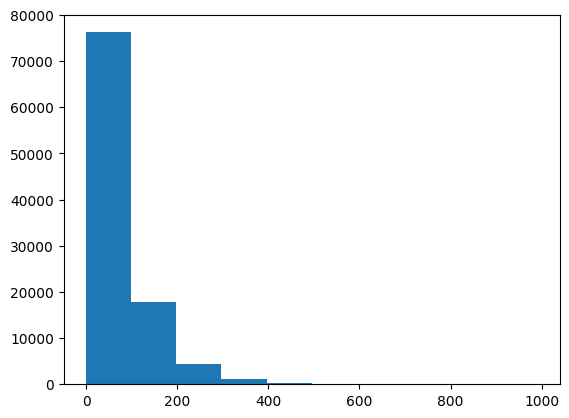

In [124]:
class MersenneTwister:
    def __init__(self, seed=5489):
        self.n = 624  # Tamaño del estado
        self.state = [0] * self.n
        self.index = self.n  # Índice inicial
        self.seed(seed)

    def seed(self, seed):
        """Inicializa la matriz de estado"""
        self.state[0] = seed
        for i in range(1, self.n):
            self.state[i] = (1812433253 * (self.state[i-1] ^ (self.state[i-1] >> 30)) + i) & 0xFFFFFFFF

    def twist(self):
        """Realiza la transformación de mezcla"""
        for i in range(self.n):
            y = (self.state[i] & 0x80000000) + (self.state[(i+1) % self.n] & 0x7FFFFFFF)
            self.state[i] = self.state[(i + 397) % self.n] ^ (y >> 1)
            if y % 2 != 0:  # Aplicar la máscara si el bit menos significativo es 1
                self.state[i] ^= 0x9908B0DF
        self.index = 0

    def extract_number(self):
        """Extrae un número aleatorio"""
        if self.index >= self.n:
            self.twist()

        y = self.state[self.index]
        self.index += 1

        # Aplicar las transformaciones no lineales
        y ^= (y >> 11)
        y ^= (y << 7) & 0x9D2C5680
        y ^= (y << 15) & 0xEFC60000
        y ^= (y >> 18)

        return y & 0xFFFFFFFF  # Retornar solo 32 bits

# Uso del generador
mt = MersenneTwister(seed=30)

nums = []
k = 0.98 #k<1 (forma)
theta = 69 #(escala)
# Generar n números aleatorios
for _ in range(100000):
    U_1 = mt.extract_number() / 0xFFFFFFFF  # Normalizar entre 0 y 1
    z_0 = theta * (- np.log(U_1))**(1/k) #método de la trasformada inversa
    #print(z_0)
    nums.append(int(z_0))

textfile = open('Gamma_distribution.txt','w')
for x_i in nums: 
    textfile.write("%s\n" % x_i)

nums.sort()
nums = np.array(nums)

plt.hist(nums)
plt.plot()

In [125]:
print(nums[-1])

990


### Media

$$\mu = k \theta$$

In [126]:
def mean(list_nums):
    n = len(list_nums)
    return round(sum(list_nums) / n, 3)

In [127]:
print(f'Media: {mean(nums)}')

Media: 68.626


In [128]:
print(f'Media: {theta * k}')

Media: 67.62


### Varianza

$$\sigma ^2 = k \theta ^ 2 $$

In [129]:
def k_central_moment(list_nums, k):
    n = len(list_nums)
    mean_ = mean(list_nums)
    return round(sum((list_nums - mean_) ** k) / n, 3)

In [130]:
print(f'Varianza: {k_central_moment(nums, 2)}')

Varianza: 4990.997


In [131]:
print(f'Varianza: {k * theta ** 2}')

Varianza: 4665.78


### Curtosis

$$\beta _{2} = EDC + 3 = 6 / k + 3$$

*  leptocúrtica: $\beta _{2} > 3$; distribución con cola más largas que la normal.
*  platicúrtica: $\beta _{2} < 3$; distribución con colas menos largas que la normal.
*  mesocúrtica: $\beta _{2} = 3$; cuando tiene una distribución normal (o su misma curtosis).

In [132]:
def curtosis(list_nums):
    return k_central_moment(list_nums, 4) / (k_central_moment(list_nums, 2) ** 2)

In [133]:
print(f'Curtosis: {curtosis(nums)}')

Curtosis: 9.484666246919472


In [134]:
print(f'Curtosis: {6 / k + 3}')

Curtosis: 9.122448979591837


### Sesgo (skewness)

$$S = \frac{2}{\sqrt{k}}$$
* $S<0$; la masa de la distribución está concentrada del lado derecho.
* $S>0$; la masa de la distribución está concentrada del lado izquierdo.

In [135]:
print(f'sesgo: {2 / np.sqrt(k)}')

sesgo: 2.020305089104421
